# Genre recognition: experiment

Goal: Explore the effect of $\lambda_d$.

Conclusion: A value of $\lambda_d$ between 10 and 100 seems reasonable (when $\lambda_g=100$ and $\lambda_s=1$). It corresponds to the range of $\lambda_s$, i.e. between 1 and 10 for $\lambda_d=\lambda_g=100$. We want a ratio $\frac{\lambda_d}{\lambda_s}$ between 10 and 100. This ratio controls sparsity and, indirectly, speed.

Observations:
* In the previous experiment with $\lambda_d = \lambda_g = 100$, $\lambda_s = 1$ was found to be the best option. So we fixed $\lambda_g = 100$ and $\lambda_s=1$.
* The experiment with $\lambda_d = \lambda_g = 100$ and $\lambda_s=1$ is 1.5 times faster with `rtol=1e-5` (compared with the previous experiment). Accuracy dropped from 73.06 to 72.49.
* Time to extract features increases with $\lambda_d$. It is the term which couples the two variables we optimize for.
* Ran for 16h30.

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'ld'
Pvalues = [1, 10, 100, 1e3, 1e4]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 100
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5

### Numerical parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['Nfolds'] = 10
p['Ncv'] = 40
p['dataset_classification'] = 'Z'

## Processing

In [4]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph -------------------- 

Data: (149000, 96), float32
Elapsed time: 221.14 seconds
All self-referenced in the first column: True
dist in [0.0, 0.432167828083]
w in [0.0362241715193, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2279908,), float32
  L_indices : (2279908,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2279908,), float32
  W_indices : (2279908,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 230.34 seconds

 -------------------- Features, ld = 1 -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648,0

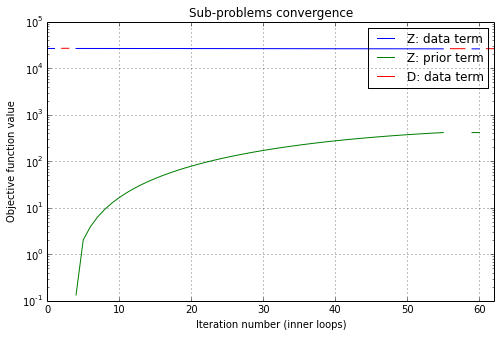

Inner loop: 63 iterations
g(Z) = ||X-DZ||_2^2 = 2.619447e+04
rdiff: 0.00844531997372
i(Z) = ||Z||_1 = 4.153597e+02
j(Z) = tr(Z^TLZ) = 8.017119e+00


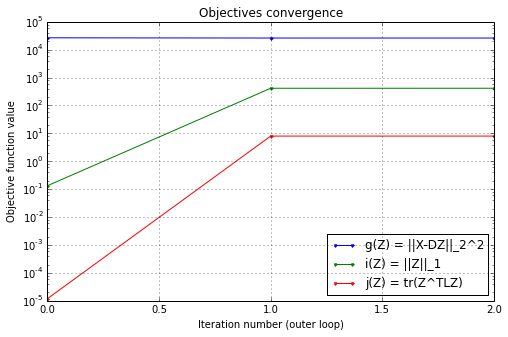

Global objective: 2.661785e+04


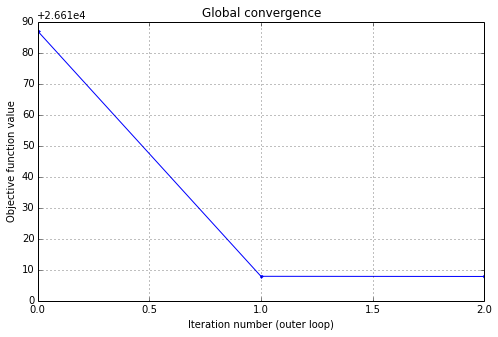

Outer loop: 3 iterations

Z in [0.0, 0.0081849405542]
Sparsity of Z: 412,527 non-zero entries out of 19,072,000 entries, i.e. 2.2%.


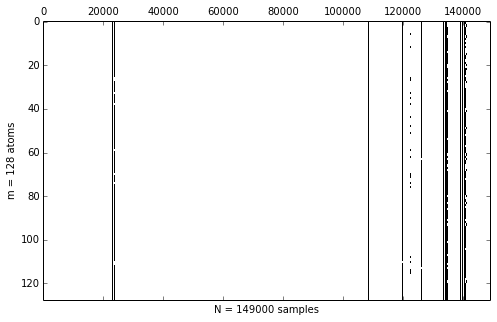

D in [0.00812118500471, 0.281162023544]
d in [0.999999582767, 1.00000023842]
Constraints on D: True


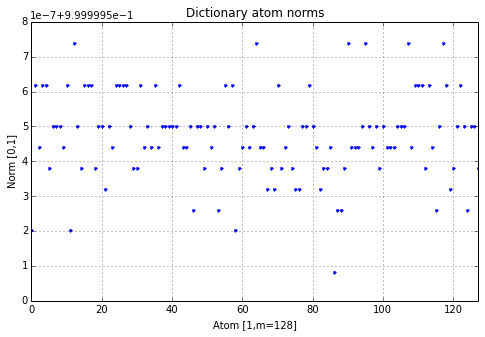

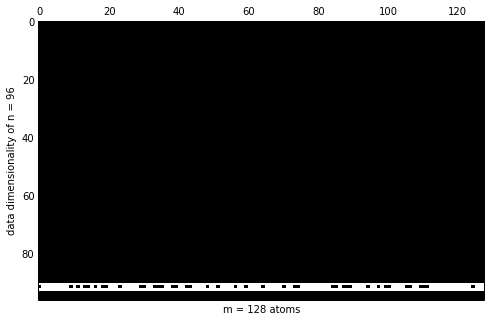

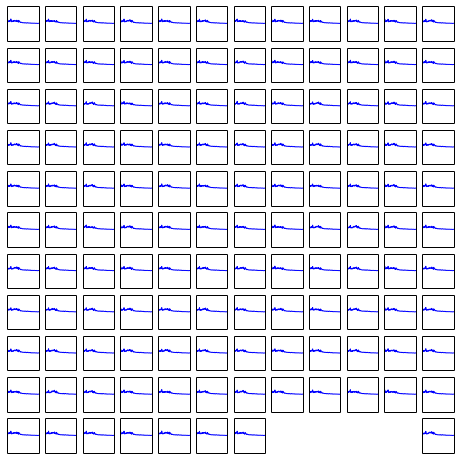

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 140 seconds

 -------------------- Classification, ld = 1 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 

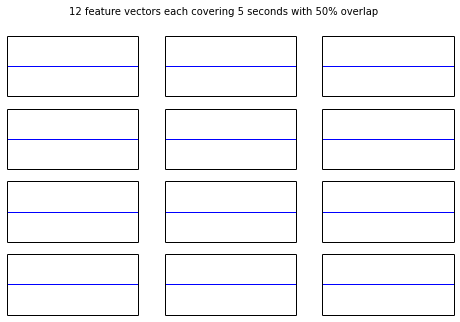

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 21.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 22.1 %
Clips accuracy: 22.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  16 (+/- 4.8) <- [18 24 10 10 14 20 12 10 18 20]
  16 (+/- 3.3) <- [12 12 22 18 18 14 14 20 14 14]
  17 (+/- 2.5) <- [22 16 16 14 16 18 18 14 20 20]
  16 (+/- 3.6) <- [16 14 16 16 22 12 12 12 18 22]
  16 (+/- 3.3) <- [10 18 18 12 16 18 14 18 22 16]
  16 (+/- 2.4) <- [14 16 18 16 18 12 12 20 16 16]
  17 (+/- 4.8) <- [ 6 18 20 16 24 18 16 22 12 16]
  17 (+/- 4.1) <- [18 22 18 16 22 18 12 20 18  8]
  16 (+/- 3.3) <- [16 12 20 14 22 12 16 18 14 20]
  18 (+/-

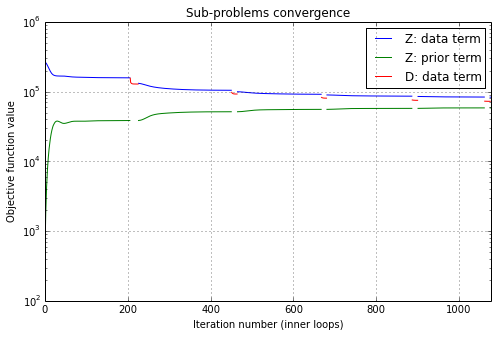

Inner loop: 1079 iterations
g(Z) = ||X-DZ||_2^2 = 7.238450e+04
rdiff: 0.000892518293893
i(Z) = ||Z||_1 = 5.829241e+04
j(Z) = tr(Z^TLZ) = 1.074934e+04


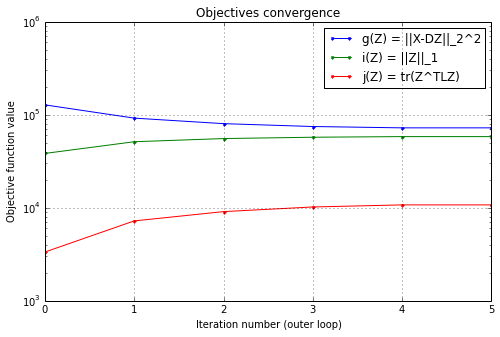

Global objective: 1.414263e+05


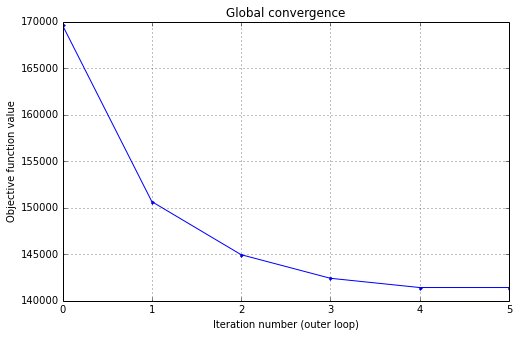

Outer loop: 6 iterations

Z in [-0.0834140777588, 0.889378726482]
Sparsity of Z: 3,604,776 non-zero entries out of 19,072,000 entries, i.e. 18.9%.


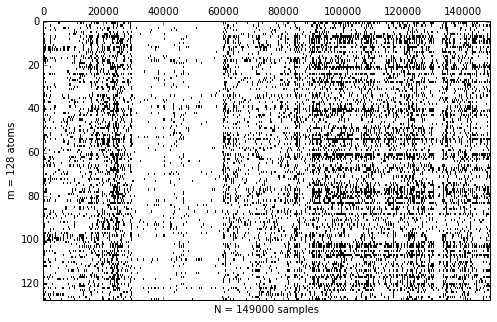

D in [-0.0359300412238, 0.915727615356]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


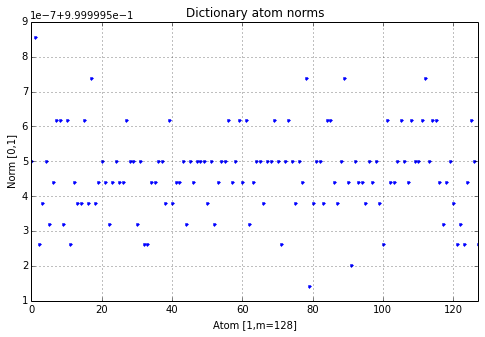

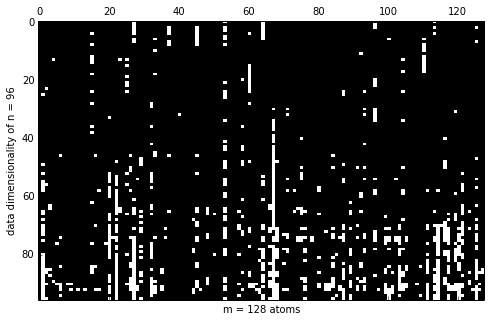

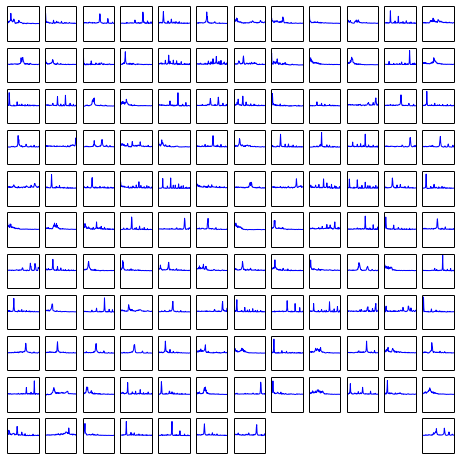

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2318 seconds

 -------------------- Classification, ld = 10 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=12

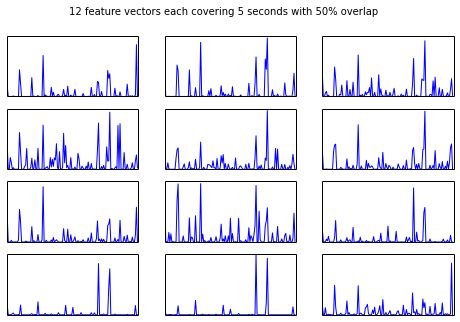

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.0 %
Clips accuracy: 71.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  71 (+/- 6.0) <- [72 76 68 70 68 86 68 62 72 72]
  73 (+/- 4.4) <- [68 74 80 68 78 78 74 70 68 70]
  72 (+/- 6.0) <- [68 82 82 68 70 72 66 76 66 66]
  69 (+/- 3.8) <- [64 68 68 70 66 70 74 72 76 64]
  71 (+/- 3.4) <- [66 70 66 78 70 72 74 70 70 72]
  71 (+/- 5.2) <- [66 82 70 76 76 70 70 70 64 66]
  71 (+/- 6.0) <- [70 74 57 78 72 66 76 66 68 78]
  72 (+/- 5.9) <- [66 68 72 68 86 64 76 74 72 72]
  71 (+/- 7.6) <- [78 68 72 76 80 84 64 68 57 66]
  72 (+/-

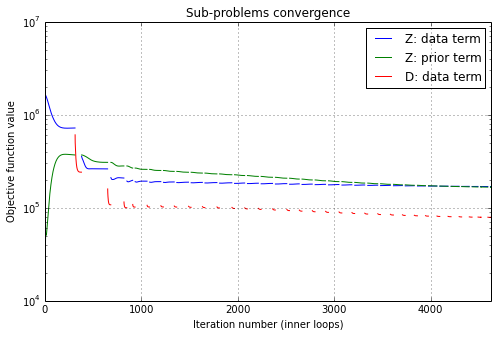

Inner loop: 4632 iterations
g(Z) = ||X-DZ||_2^2 = 7.864703e+04
rdiff: 0.00310425725601
i(Z) = ||Z||_1 = 1.668191e+05
j(Z) = tr(Z^TLZ) = 9.046062e+04


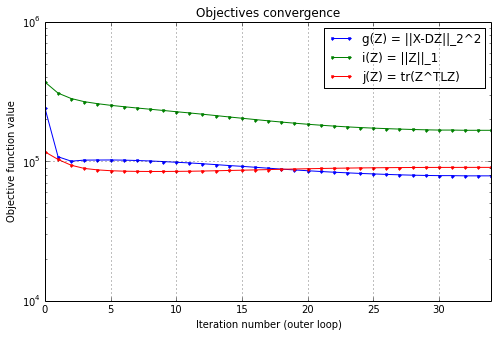

Global objective: 3.359268e+05


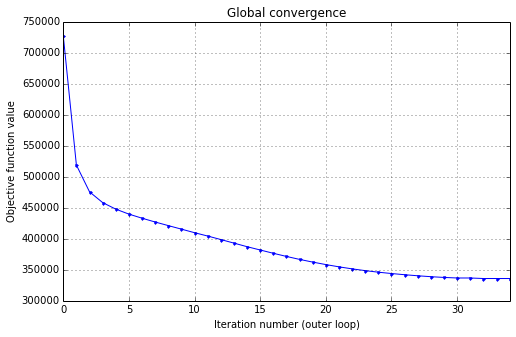

Outer loop: 35 iterations

Z in [-0.906480252743, 1.10867500305]
Sparsity of Z: 7,934,225 non-zero entries out of 19,072,000 entries, i.e. 41.6%.


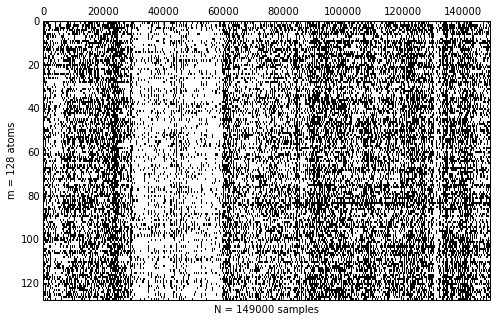

D in [-0.948690414429, 0.983948886395]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


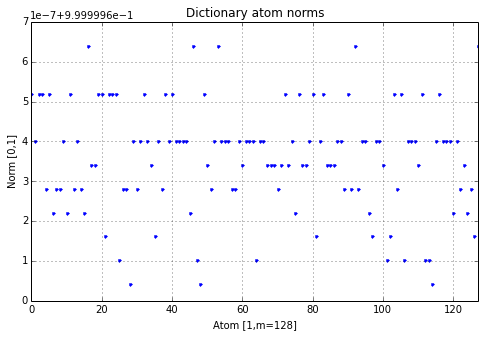

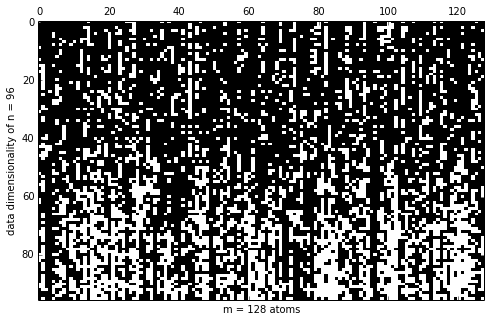

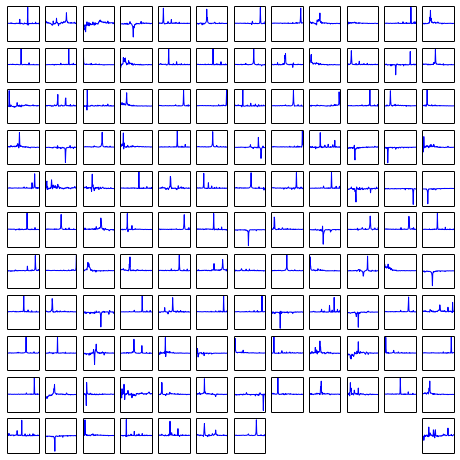

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 8814 seconds

 -------------------- Classification, ld = 100 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=1

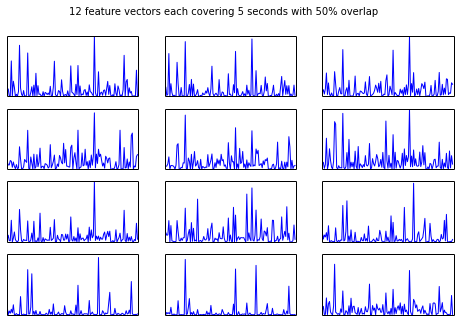

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.6 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.7 %
Clips accuracy: 74.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  74 (+/- 4.6) <- [74 76 76 70 66 82 72 70 80 74]
  71 (+/- 5.6) <- [62 76 62 64 72 78 72 76 72 72]
  74 (+/- 4.3) <- [78 78 80 70 74 72 66 78 74 70]
  73 (+/- 6.0) <- [64 82 72 68 72 76 74 74 82 64]
  73 (+/- 4.5) <- [64 78 68 78 78 74 74 70 74 70]
  74 (+/- 7.0) <- [74 92 72 66 78 76 68 68 72 72]
  73 (+/- 6.6) <- [62 66 66 76 84 76 68 78 74 78]
  74 (+/- 3.8) <- [72 74 80 78 78 66 74 72 72 72]
  73 (+/- 4.1) <- [74 72 78 74 78 64 70 78 72 74]
  72 (+/-

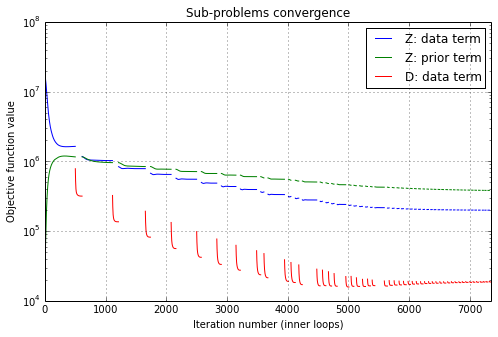

Inner loop: 7359 iterations
g(Z) = ||X-DZ||_2^2 = 1.860465e+04
rdiff: 0.000243997582579
i(Z) = ||Z||_1 = 3.820568e+05
j(Z) = tr(Z^TLZ) = 1.803437e+05


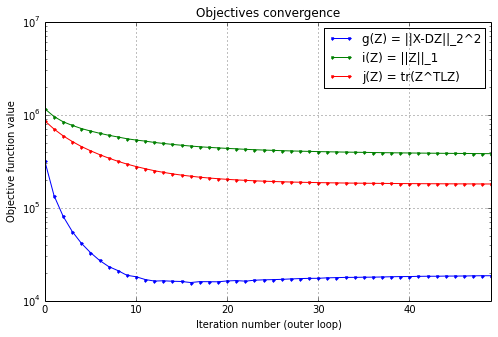

Global objective: 5.810052e+05


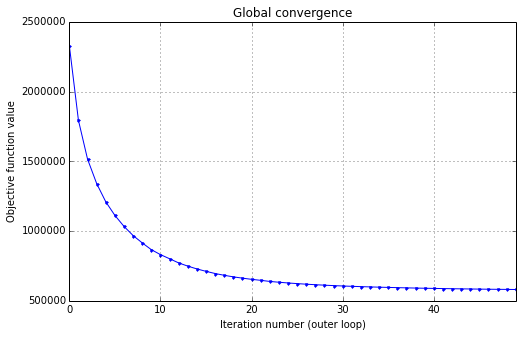

Outer loop: 50 iterations

Z in [-0.423380792141, 0.545486330986]
Sparsity of Z: 16,502,271 non-zero entries out of 19,072,000 entries, i.e. 86.5%.


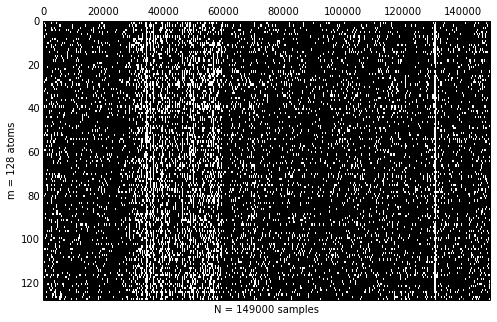

D in [-0.345819354057, 0.441300600767]
d in [0.999999761581, 1.00000023842]
Constraints on D: True


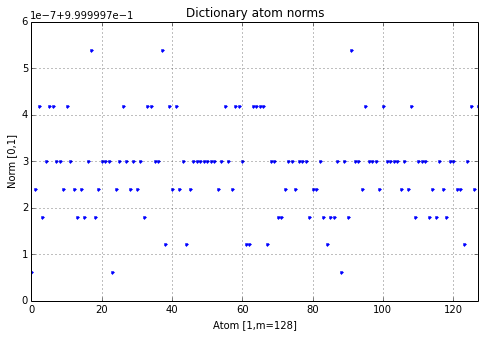

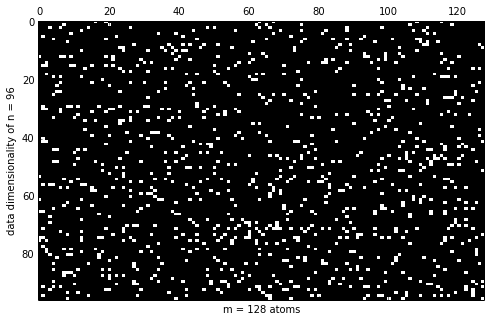

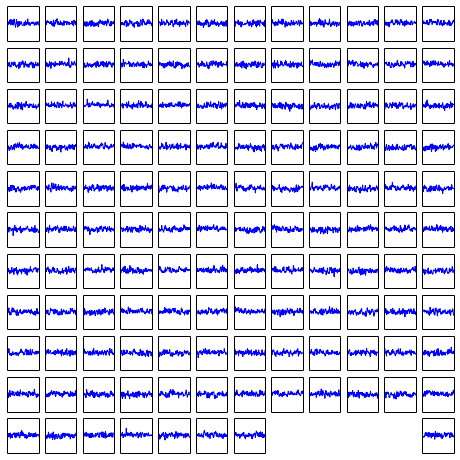

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 11862 seconds

 -------------------- Classification, ld = 1000.0 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x

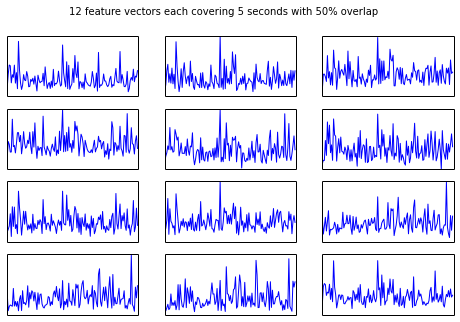

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 69.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 57.2 %
Clips accuracy: 67.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  67 (+/- 5.9) <- [60 74 64 62 70 78 57 68 70 68]
  68 (+/- 5.8) <- [74 68 64 54 70 74 68 68 64 74]
  69 (+/- 5.9) <- [60 78 72 68 57 70 66 74 72 72]
  68 (+/- 5.3) <- [64 74 74 66 56 74 68 66 70 68]
  68 (+/- 6.4) <- [57 70 68 74 68 80 70 57 66 64]
  69 (+/- 3.6) <- [68 70 76 68 74 68 64 66 66 66]
  69 (+/- 4.9) <- [66 68 57 72 70 70 64 76 74 70]
  69 (+/- 3.6) <- [72 68 64 70 74 62 70 68 72 72]
  67 (+/- 4.1) <- [70 64 66 74 60 72 64 68 64 70]
  69 (+/-

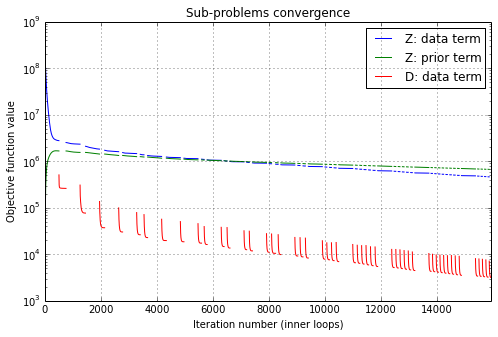

Inner loop: 15951 iterations
g(Z) = ||X-DZ||_2^2 = 3.124855e+03
rdiff: 0.0119490451035
i(Z) = ||Z||_1 = 6.699093e+05
j(Z) = tr(Z^TLZ) = 4.560384e+05


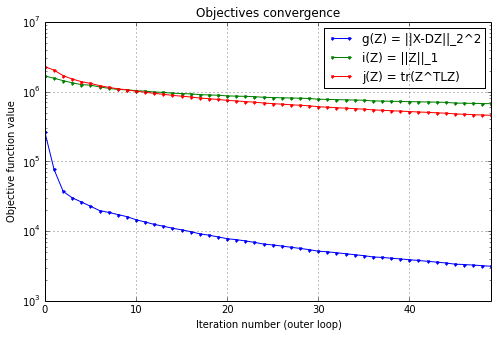

Global objective: 1.129073e+06


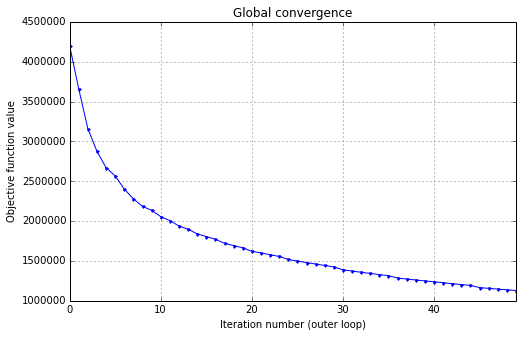

Outer loop: 50 iterations

Z in [-0.83953756094, 0.733539998531]
Sparsity of Z: 17,965,510 non-zero entries out of 19,072,000 entries, i.e. 94.2%.


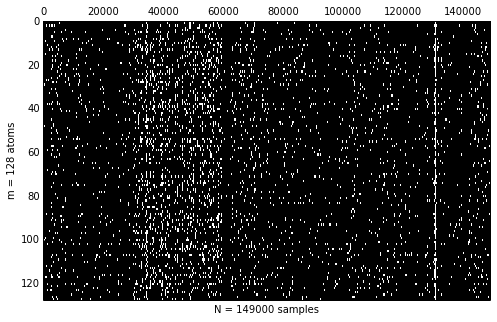

D in [-0.133339911699, 0.277615457773]
d in [0.911229729652, 1.00000023842]
Constraints on D: True


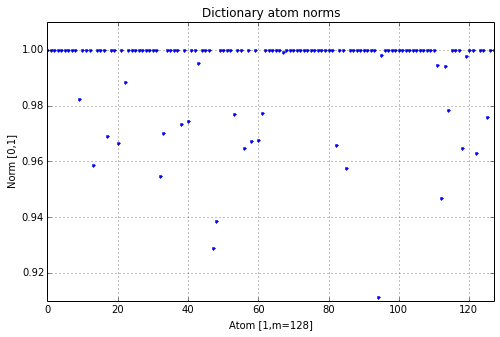

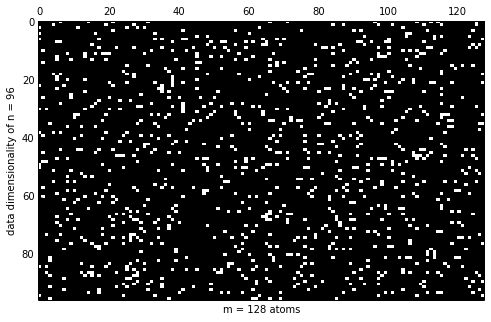

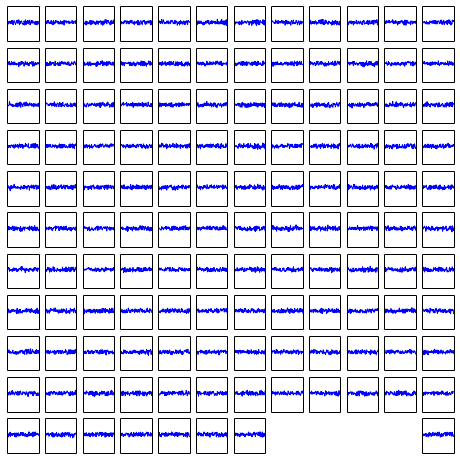

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 25802 seconds

 -------------------- Classification, ld = 10000.0 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 

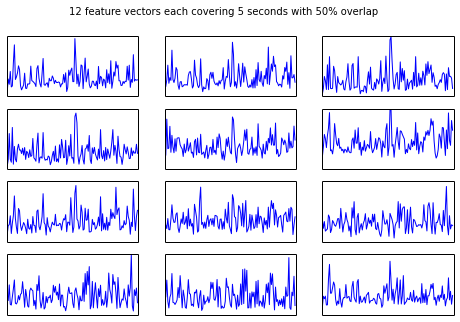

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 67.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 55.0 %
Clips accuracy: 66.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  69 (+/- 5.2) <- [66 76 70 68 74 76 66 57 70 68]
  70 (+/- 5.7) <- [64 80 74 60 72 68 74 74 70 64]
  69 (+/- 5.0) <- [74 66 80 68 60 70 66 70 68 70]
  68 (+/- 6.5) <- [60 74 70 70 62 60 74 72 78 60]
  67 (+/- 4.2) <- [70 68 64 64 70 72 64 68 72 57]
  67 (+/- 6.3) <- [68 78 72 70 72 62 68 62 66 54]
  67 (+/- 5.1) <- [64 66 57 72 66 62 68 64 72 76]
  68 (+/- 8.2) <- [64 74 54 70 84 64 76 68 64 60]
  67 (+/- 6.8) <- [80 60 62 68 78 70 62 60 64 64]
  68 (+/-

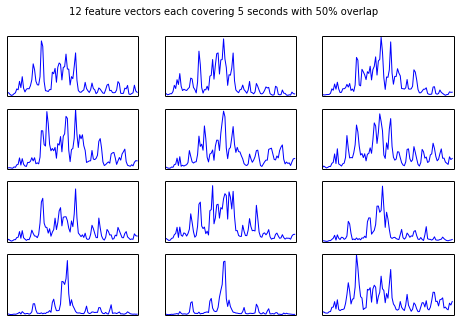

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1152), float64
Labels: (500,), uint8
  67 (+/- 8.0) <- [72 74 60 48 62 74 72 66 66 74]
  66 (+/- 6.5) <- [70 60 62 52 64 70 72 68 66 76]
  68 (+/- 6.7) <- [74 68 84 62 68 70 62 62 70 62]
  68 (+/- 5.5) <- [60 72 62 66 74 74 72 64 76 64]
  67 (+/- 5.1) <- [57 74 66 70 68 64 72 62 74 64]
  68 (+/- 6.1) <- [68 78 74 64 72 70 68 57 57 66]
  66 (+/- 3.7) <- [62 70 60 68 68 66 60 68 70 68]
  67 (+/- 5.9) <- [68 60 57 68 80 64 64 68 64 72]
  65 (+/- 6.0) <- [68 54 68 66 76 62 68 70 62 57]
  66 (+/- 6

In [5]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if not regen_graph and not regen_features:
    # Classifier parameters are being tested.
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
else:
    separator('Baseline')
    %run audio_classification.ipynb
res['baseline'] = len(Pvalues) * [accuracy]
res['baseline_std'] = len(Pvalues) * [accuracy_std]

## Results

ld: [1, 10, 100, 1000.0, 10000.0]
accuracy_std: [3.5320107587605074, 5.9623632059779874, 6.0765923838941225, 5.9583219114109633, 6.3905379272796727]
objective_j: [8.0171190202236176, 10749.341583251953, 90460.6201171875, 180343.73779296875, 456038.427734375]
objective_i: [415.35968017578125, 58292.4140625, 166819.109375, 382056.78125, 669909.3125]
objective_h: [0, 0, 0, 0, 0]
objective_g: [26194.47265625, 72384.501953125, 78647.03369140625, 18604.650497436523, 3124.8548626899719]
baseline: [67.059999999999974, 67.059999999999974, 67.059999999999974, 67.059999999999974, 67.059999999999974]
time_features: [132.26830220222473, 2308.8033258914948, 8803.946810007095, 11850.685628890991, 25789.971470832825]
baseline_std: [6.4277834437697035, 6.4277834437697035, 6.4277834437697035, 6.4277834437697035, 6.4277834437697035]
sparsity: [2.1629981124161075, 18.90088087248322, 41.601431417785236, 86.5261692533557, 94.19835360738254]
iterations_inner: [63, 1079, 4632, 7359, 15951]
iterations_outer: [

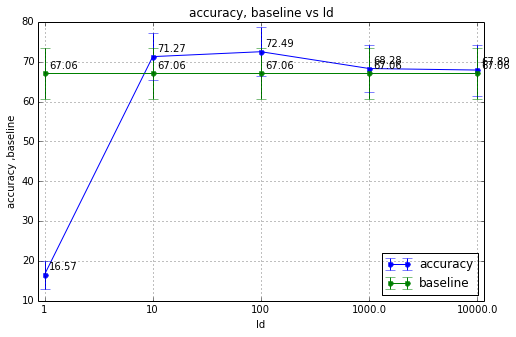

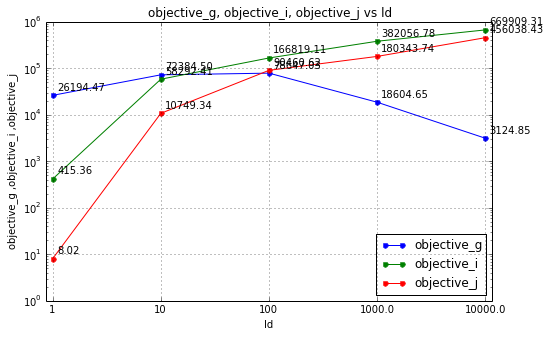

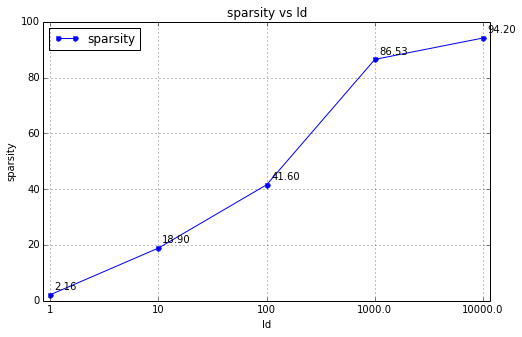

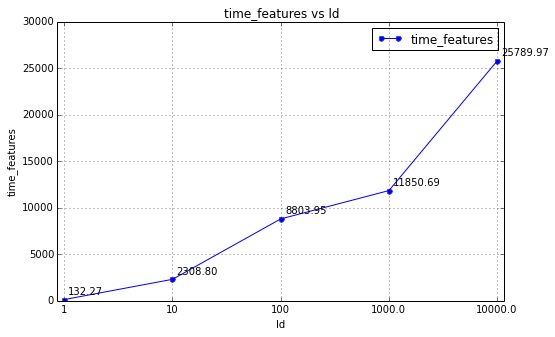

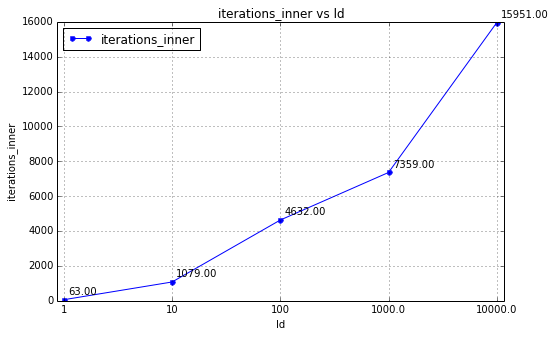

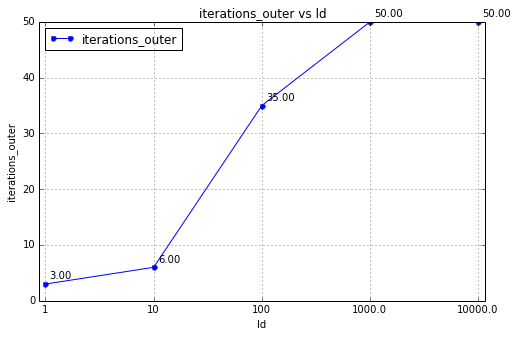

Dictionary atoms for ld = 1
Dictionary atoms for ld = 10
Dictionary atoms for ld = 100
Dictionary atoms for ld = 1000.0
Dictionary atoms for ld = 10000.0
Experiment time: 59322 seconds


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [6]:
print('{}: {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('{}: {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25 / (len(Pvalues)-1)
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

# Classification results.
plot('accuracy', 'baseline', err=['accuracy_std', 'baseline_std'])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    plot('sparsity')
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))

### Unweighted objectives

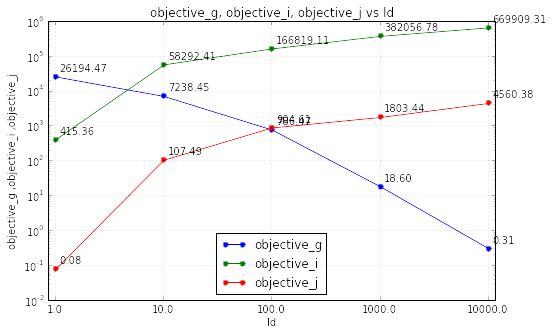

g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25 / (len(Pvalues)-1)
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

Pname = 'ld'
Pvalues = np.array([1,10,100,1e3,1e4])
res = {}
res['objective_j'] = [8.0171190202236176, 10749.341583251953, 90460.6201171875, 180343.73779296875, 456038.427734375]
res['objective_i'] = [415.35968017578125, 58292.4140625, 166819.109375, 382056.78125, 669909.3125]
res['objective_g'] = [26194.47265625, 72384.501953125, 78647.03369140625, 18604.650497436523, 3124.8548626899719]
res['objective_j'] /= np.array(100)  # lg
res['objective_i'] /= np.array(1)  # ls
res['objective_g'] /= Pvalues  # ld
plot('objective_g', 'objective_i', 'objective_j', log=True)
print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')